Sample script for MNLab2BICN.

メディアネットワーク実験IIB 項目Iで利用するサンプル．

PSK および QAM は適切に実装されていません．`要修正`を要修正です．

必要なファイルを`github`から取り出す．

In [1]:
!test -d mnlab2bicn && (cd mnlab2bicn ; git pull) || git clone https://github.com/htsutsui/mnlab2bicn/
!cp mnlab2bicn/mnlab2bicn.py .
!cp mnlab2bicn/gray.py .

Cloning into 'mnlab2bicn'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 115 (delta 62), reused 76 (delta 36), pack-reused 0
Receiving objects: 100% (115/115), 28.66 KiB | 7.17 MiB/s, done.
Resolving deltas: 100% (62/62), done.


`mnlab2bicn`が依存する`gmpy2` (BER計算を高速化する)をインストールする．
なお，`gmpy2`が無くてもBER計算は可能(若干遅くなる)なので，エラーが生じる場合は無視すること．

In [2]:
!sudo apt-get update
!sudo apt-get install -y libgmp-dev libmpfr-dev libmpc-dev
!pip install gmpy2

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

NumPy と Matplotlib を使うので`import`する．

In [3]:
import matplotlib.pyplot as plt
import numpy as np

実験で使用するあらかじめ用意されている関数を`import`する．

In [4]:
from mnlab2bicn import awgn, calc_ser, calc_ber, \
    int2gray, gray2int, scatter_plot

このscript中で利用するdebug用の変数．

In [5]:
verbose = True # True だと for loop の処理の状況(進み具合)が確認できる
verbose_awgn = False

PSKのシミュレーションを行う関数を定義する．

In [6]:
def psk_test(m_level, i_snr, i_size, plot=False, gray=False):
    """PSK test

    Parameters
    ----------
    m_level: modulation level (integer)
    i_snr: SNR in dB
    i_size: number of samples
    plot: optional. if True, scatter plot will be generated.
    gray: optional. if True, gray code is used.

    Returns
    -------
    (SER, BER)
    """
    src = np.random.randint(m_level, size=i_size)

    x = int2gray(src) if gray else src

    # Start of 要修正
    y = np.exp(1j*np.pi*2/m_level*x)
    # End of 要修正

    y_noisy = awgn(y, i_snr, verbose_awgn)

    if plot:
        scatter_plot(y_noisy, f"PSK_{m_level}_{i_snr}_{i_size}")

    # Start of 要修正
    z = np.angle(y_noisy)
    z = z/(np.pi*2/m_level)
    z = z.round()
    z = np.array(z.round(), dtype='int')
    z = np.where(z<0, z+m_level, z)
    # End of 要修正

    z = np.array(z, dtype='int')

    dst = gray2int(z) if gray else z

    return (calc_ser(src, dst), calc_ber(src, dst, m_level))

## I)PSKで6角形に配置してみます

(0.0, 0.0)

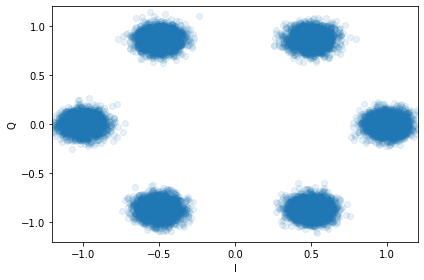

In [7]:
psk_test(m_level = 6, i_snr = 20, i_size = 20000, plot=True)

### 信号が6角形になっているのが分かると思います．
### この6PSKの性能をほかのPSKと比べてみましょう,SNR-BERプロットを行ってみます．

[0, 64, 0.943118, 0.42146633333333333]
[2, 64, 0.929348, 0.40127]
[4, 64, 0.912166, 0.378618]
[6, 64, 0.890272, 0.35442066666666666]
[8, 64, 0.861706, 0.328484]
[10, 64, 0.82578, 0.302485]
[12, 64, 0.781844, 0.27591466666666664]
[14, 64, 0.72827, 0.24926066666666666]
[16, 64, 0.662478, 0.22074233333333335]
[18, 64, 0.581172, 0.19091566666666668]
[20, 64, 0.487904, 0.160103]
[22, 64, 0.383428, 0.125633]
[24, 64, 0.271652, 0.08916866666666666]
[26, 64, 0.166294, 0.054485]
[28, 64, 0.08076, 0.026646666666666666]
[30, 64, 0.028078, 0.009149]
[32, 64, 0.005722, 0.0018796666666666666]
[34, 64, 0.000508, 0.000169]
[36, 64, 2e-05, 7e-06]
[38, 64, 0.0, 0.0]
[0, 64, 0.943386, 0.381643]
[2, 64, 0.929654, 0.35784133333333334]
[4, 64, 0.911882, 0.331146]
[6, 64, 0.890262, 0.303998]
[8, 64, 0.861834, 0.27645933333333333]
[10, 64, 0.826024, 0.24867866666666666]
[12, 64, 0.782956, 0.221386]
[14, 64, 0.728566, 0.193931]
[16, 64, 0.661436, 0.16648466666666667]
[18, 64, 0.580504, 0.13835133333333333]
[20

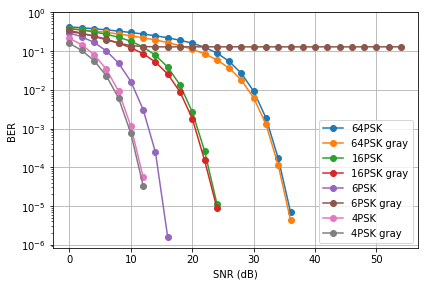

In [8]:
size = 500000
for m in [64, 16, 6, 4]:
    snrs = []
    bers = []
    for snr in range(0, 55, 2):
        ser, ber = psk_test(m, snr, size)
        if verbose:
            print([snr, m, ser, ber])
        if ber < 1e-6:
            break
        snrs.append(snr)
        bers.append(ber)
    plt.semilogy(snrs, bers, '-o', label=f"{m}PSK")
    snrs = []
    bers = []
    for snr in range(0, 55, 2):
        ser, ber = psk_test(m, snr, size, gray=True)
        if verbose:
            print([snr, m, ser, ber])
        if ber < 1e-6:
            break
        snrs.append(snr)
        bers.append(ber)
    plt.semilogy(snrs, bers, '-o', label=f"{m}PSK gray")

plt.grid()
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.legend()
plt.tight_layout()
plt.ylim(top=1)
plt.savefig("PSK_gray_.png")
plt.savefig("PSK_gray_.pdf")

## I)6PSKについて以上です．

## II)らせん状シフトキーイング
### その名もArchimedes Shift Keyingです．
情報信号$x$を位相シフトと振幅シフトを行い
$$y = r(x) e^{j \theta(x)}$$とします． <br>
ここで位相シフト$r(x)$と振幅シフト$\theta(x)$は$x$によって決まり，基本となる数式は以下で表現されます<br>

$$
\theta = \Delta \theta  \cdot x\\
r = a \theta \\
 \\
\Delta \theta = \frac{2.0 \pi}{回転数} \cdot \frac{1}{配置信号数}
$$

なお，$a$は振幅$r$の最大値が$1.0$になるように正規化するための定数です．

In [9]:
import math

def ask_test(m_level, i_snr, i_size, rotation_num = 2, plot=False, gray=False):
    """PSK test

    Parameters
    ----------
    m_level: modulation level (integer)
    i_snr: SNR in dB
    i_size: number of samples
    a: r = a * theta
    rotation_num: くるくる回転する回数
    plot: optional. if True, scatter plot will be generated.
    gray: optional. if True, gray code is used.

    Returns
    -------
    (SER, BER)
    """
    src = np.random.randint(m_level, size=i_size)

    x = int2gray(src) if gray else src


    # Start of 要修正
    #y = np.exp(1j*np.pi*2/m_level*x)
    # End of 要修正
    """
    2.0 * np.pi * (rotation_num + 1) * a= 1.0
    <-> a = 1.0 / (2.0 * np.pi * (rotation_num + 1))
    """

    a = 1.0 / (2.0 * np.pi * (rotation_num + 1))

    """
    xに位相シフトと振幅シフトを適用させる
    y = r * exp(j theta x)
    r = a * theta
    """

    #Shift Start
    d_theta = np.pi*2/m_level * rotation_num

    theta = d_theta * x + (2.0 * np.pi) * 1.0
    r = a * theta
    y = r * np.exp(1j*theta)
    #Shift End

    y_noisy = awgn(y, i_snr, verbose_awgn)

    if plot:
        scatter_plot(y_noisy, f"PSK_{m_level}_{i_snr}_{i_size}")

    # Start of PSK Decryption
    """ 
    z = np.angle(y_noisy)
    z = z/(np.pi*2/m_level)
    z = z.round()
    z = np.array(z.round(), dtype='int')
    z = np.where(z<0, z+m_level, z)
    """
    # End of PSK Decryption

    # Start of ASK Decryption
    z = np.abs(y) # z = r
    z = (z/a - 2.0 * np.pi) / d_theta
    # End of ASK Decryption

    z = np.array(z, dtype='int')

    dst = gray2int(z) if gray else z

    return (calc_ser(src, dst), calc_ber(src, dst, m_level))

#### 複号技術
我々の目的は変調した信号$y$にGauss雑音$\epsilon$が乗った$\hat{y} = y + \epsilon$から$x$を複号することです．受信側は$\hat{y}$しか観測できていないことに注意しましょう．
$$
  \hat{y} = \hat{r} e^{j \hat{\theta}}
$$
とおき，今回のアルゴリズムは振幅$\hat{r}$から情報信号$x$を復号してみることにします．<br>
上式より
$$
\hat{r} = |\hat{y}|
$$
と絶対値をとることで求められます．<br>
また，変調$r = a \theta  , (\theta = \Delta \theta \cdot x)$を思い出しましょう．いま，$\hat{r}$をとりだしたので，情報信号$x$は以下のように予測することができます．
$$
\hat{x} = \frac{\hat{r}}{a} \cdot \frac{1}{\Delta \theta }
$$

### 信号配置を見てみましょう

(0.38665, 0.11426666666666667)

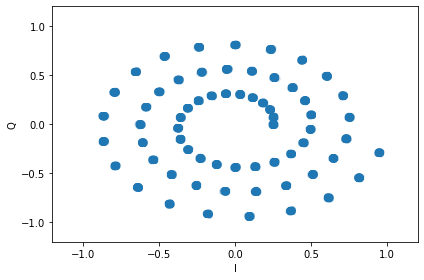

In [10]:
ask_test(m_level = 64, i_snr = 40, i_size = 20000, rotation_num = 3, plot=True)

(0.31645, 0.1108125)

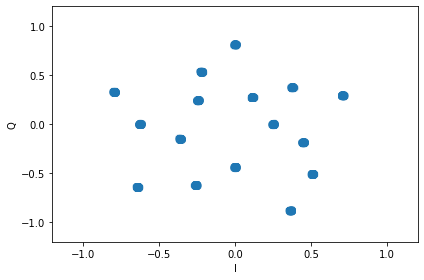

In [11]:
ask_test(m_level = 16, i_snr = 40, i_size = 20000, rotation_num = 3, plot=True)

(0.0, 0.0)

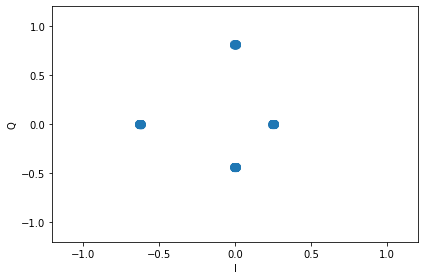

In [12]:
ask_test(m_level = 4, i_snr = 40, i_size = 20000, rotation_num = 3, plot=True)

### Archimedesの螺旋になっていることが分かると思います．

### 普通のPSKに対してSNR-BERグラフをプロットしてみましょう．

[0, 64, 0.9442, 0.42252083333333335]
[2, 64, 0.929895, 0.4014775]
[4, 64, 0.91371, 0.3797466666666667]
[6, 64, 0.89046, 0.3549025]
[8, 64, 0.86169, 0.32834583333333334]
[10, 64, 0.826345, 0.3019925]
[12, 64, 0.782195, 0.27616]
[14, 64, 0.729495, 0.2488175]
[16, 64, 0.662195, 0.22087916666666665]
[18, 64, 0.5817, 0.19167666666666666]
[20, 64, 0.485095, 0.1589175]
[22, 64, 0.383145, 0.126135]
[24, 64, 0.27228, 0.08905833333333334]
[26, 64, 0.166105, 0.0543375]
[28, 64, 0.081525, 0.026535]
[30, 64, 0.02915, 0.009600833333333333]
[32, 64, 0.00616, 0.0019858333333333334]
[34, 64, 0.00046, 0.00014583333333333335]
[36, 64, 1.5e-05, 4.166666666666667e-06]
[38, 64, 0.0, 0.0]
[0, 64, 0.375195, 0.11716166666666666]
[2, 64, 0.37502, 0.11738083333333334]
[4, 64, 0.375655, 0.1172325]
[6, 64, 0.374225, 0.11645416666666666]
[8, 64, 0.374415, 0.117075]
[10, 64, 0.374615, 0.1172675]
[12, 64, 0.37638, 0.11786666666666666]
[14, 64, 0.37345, 0.11694333333333333]
[16, 64, 0.37549, 0.1173475]
[18, 64, 0.3758

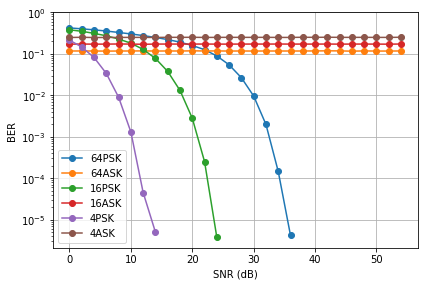

In [13]:
size = 200000
for m in [64, 16, 4]:
    snrs = []
    bers = []
    for snr in range(0, 55, 2):
        ser, ber = psk_test(m, snr, size)
        if verbose:
            print([snr, m, ser, ber])
        if ber < 1e-6:
            break
        snrs.append(snr)
        bers.append(ber)
    plt.semilogy(snrs, bers, '-o', label=f"{m}PSK")

    #ASK
    snrs = []
    bers = []
    for snr in range(0, 55, 2):
        ser, ber = ask_test(m, snr, size)
        if verbose:
            print([snr, m, ser, ber])
        if ber < 1e-6:
            break
        snrs.append(snr)
        bers.append(ber)
    plt.semilogy(snrs, bers, '-o', label=f"{m}ASK")

plt.grid()
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.legend()
plt.tight_layout()
plt.ylim(top=1)
plt.savefig("PSK_QAM_ASK.png")
plt.savefig("PSK_QAM_ASK.pdf")